**KNN Regression [Diamond Price Prediction Dataset]**

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [99]:
# QUESTION 1A, 2, 3 DONE IN THIS IN COMBINED FORM


import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder  #for label encoding
from sklearn import preprocessing #for normalisation
from sklearn.model_selection import train_test_split # to split data into training sets and test sets
import warnings
warnings.filterwarnings('ignore')

def Euclidean_distance(v1,v2):  
  sum=0
  for p,q in zip(v1, v2):
    sum+=(float(p)- float(q))**2
  sum = sum ** .5
  return sum


def Manhattan_distance(v1,v2):
  sum=0
  for p,q in zip(v1, v2):
    sum+=abs(float(p)- float(q))
  return sum

from sklearn.metrics import r2_score

def MSE(actual,predicted): # one is y_pred, one is y_test
  predicted=predicted.astype(float)
  sum_error = 0.0
  for i in range(len(actual)):
    sum_error += (predicted[i] - actual[i])**2
  return sum_error/ float(len(actual))

def Mean_Absolute_Error(actual, predicted):
  predicted=predicted.astype(float)
  sum_error = 0.0
  for i in range(len(actual)):
    sum_error += abs(predicted[i] - actual[i])
  return sum_error/ float(len(actual))

headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?', header=None,  names = headers) 
data = data.reset_index(drop=True)
df = data.iloc[1:]
#print("**************")

##doing label encoding
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['cut_encoded'] = labelencoder.fit_transform(df['cut'])
df['clarity_encoded'] = labelencoder.fit_transform(df['clarity'])
df['color_encoded'] = labelencoder.fit_transform(df['color'])
df=df.drop(['cut', 'clarity','color'], axis = 1) 

## doing NORMALISATION on every column except price for range 0-1 (that's why *1)
df["color_encoded"]=((df["color_encoded"]-df["color_encoded"].min())/(df["color_encoded"].max()-df["color_encoded"].min()))*1
df["clarity_encoded"]=((df["clarity_encoded"]-df["clarity_encoded"].min())/(df["clarity_encoded"].max()-df["clarity_encoded"].min()))*1
df["cut_encoded"]=((df["color_encoded"]-df["color_encoded"].min())/(df["color_encoded"].max()-df["color_encoded"].min()))*1

df['depth'] = pd.to_numeric(df['depth']) 
df["depth"]=((df["depth"]-df["depth"].min())/(df["depth"].max()-df["depth"].min()))*1

df['table'] = pd.to_numeric(df['table']) 
df["table"]=((df["table"]-df["table"].min())/(df["table"].max()-df["table"].min()))*1

df['x'] = pd.to_numeric(df['x']) 
df["x"]=((df["x"]-df["x"].min())/(df["x"].max()-df["x"].min()))*1

df['y'] = pd.to_numeric(df['y']) 
df["y"]=((df["y"]-df["y"].min())/(df["y"].max()-df["y"].min()))*1

df['z'] = pd.to_numeric(df['z']) 
df["z"]=((df["z"]-df["z"].min())/(df["z"].max()-df["z"].min()))*1

#print(df.sample(5))

y=df['price']
df=df.drop(['price'], axis = 1) 
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.02, random_state=32)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

k_set=[2,3,5,7,11,16]
ll=len(y_test)
from sklearn.metrics import r2_score

main_list_Euclidean=[] #list of lists where [x_test , k , avg of k y_train]
for x in x_test:
  i=0
  l=[]
  for y in x_train:
    l.append([float(Euclidean_distance(x,y)),int(i)])
    i=i+1
  l.sort(key=lambda l:l[0])
  for k in k_set:
    sum=0
    for val in l[:k]:
      sum+=int(float(y_train[val[1]]))
    avg=float(float(sum)/k)
    lp=[x,k,avg]
    main_list_Euclidean.append(lp)


print("***********************")

main_list_Euclidean.sort(key=lambda main_list_Euclidean:main_list_Euclidean[1]) 

plot1=[]
for oo in main_list_Euclidean[:15]:
  plot1.append(oo[2])

print("Mean Squared Error with Euclidean distance: k= 2")
print(MSE( [row[2] for row in main_list_Euclidean[:1079]   ] , y_test))

print("Mean Squared Error with Euclidean distance: k= 3")
print(MSE([row[2] for row in main_list_Euclidean[1079:2158]] , y_test))

print("Mean Squared Error with Euclidean distance: k= 5")
print(MSE([row[2] for row in main_list_Euclidean[2158:3237]] , y_test))

print("Mean Squared Error with Euclidean distance: k= 7")
print(MSE([row[2] for row in main_list_Euclidean[3237:4316]] , y_test))

print("Mean Squared Error with Euclidean distance: k= 11")
print(MSE([row[2] for row in main_list_Euclidean[4316:5395]] , y_test))

print("Mean Squared Error with Euclidean distance: k= 16")
print(MSE([row[2] for row in main_list_Euclidean[5395:]] , y_test))

print("R2 Score with Euclidean distance: k= 2")
print(r2_score([row[2] for row in main_list_Euclidean[:1079]] , y_test))

print("R2 Score with Euclidean distance: k= 3")
print(r2_score([row[2] for row in main_list_Euclidean[1079:2158]] , y_test))

print("R2 Score with Euclidean distance: k= 5")
print(r2_score([row[2] for row in main_list_Euclidean[2158:3237]] , y_test))

print("R2 Score with Euclidean distance: k= 7")
print(r2_score([row[2] for row in main_list_Euclidean[3237:4316]] , y_test))

print("R2 Score with Euclidean distance: k= 11")
print(r2_score([row[2] for row in main_list_Euclidean[4316:5395]] , y_test))

print("R2 Score with Euclidean distance: k= 16")
print(r2_score([row[2] for row in main_list_Euclidean[5395:]] , y_test))

print("Mean Absolute Error with Euclidean distance: k= 2")
print(Mean_Absolute_Error([row[2] for row in main_list_Euclidean[:1079]] , y_test))

print("Mean Absolute Error with Euclidean distance: k= 3")
print(Mean_Absolute_Error([row[2] for row in main_list_Euclidean[1079:2158]] , y_test))

print("Mean Absolute Error with Euclidean distance: k= 5")
print(Mean_Absolute_Error([row[2] for row in main_list_Euclidean[2158:3237]] , y_test))

print("Mean Absolute Error with Euclidean distance: k= 7")
print(Mean_Absolute_Error([row[2] for row in main_list_Euclidean[3237:4316]] , y_test))

print("Mean Absolute Error with Euclidean distance: k= 11")
print(Mean_Absolute_Error([row[2] for row in main_list_Euclidean[4316:5395]] , y_test))

print("Mean Absolute Error with Euclidean distance: k= 16")
print(Mean_Absolute_Error([row[2] for row in main_list_Euclidean[5395:]] , y_test))

print("***************")

main_list_Manhattan=[] #list of lists where [x_test , k , avg of k y_train]
for x in x_test:
  i=0
  l=[]
  for y in x_train:
    l.append([float(Manhattan_distance(x,y)),int(i)])
    i=i+1
  l.sort(key=lambda l:l[0])
  for k in k_set:
    sum=0
    for val in l[:k]:
      sum+=int(float(y_train[val[1]]))
    avg=float(float(sum)/k)
    lp=[x,k,avg]
    main_list_Manhattan.append(lp)


print("***********************")

main_list_Manhattan.sort(key=lambda main_list_Manhattan:main_list_Manhattan[1]) 

print("Mean Squared Error with Manhattan distance: k= 2")
print(MSE( [row[2] for row in main_list_Manhattan[:1079]   ] , y_test))

print("Mean Squared Error with Manhattan distance: k= 3")
print(MSE([row[2] for row in main_list_Manhattan[1079:2158]] , y_test))

print("Mean Squared Error with Manhattan distance: k= 5")
print(MSE([row[2] for row in main_list_Manhattan[2158:3237]] , y_test))

print("Mean Squared Error with Manhattan distance: k= 7")
print(MSE([row[2] for row in main_list_Manhattan[3237:4316]] , y_test))

print("Mean Squared Error with Manhattan distance: k= 11")
print(MSE([row[2] for row in main_list_Manhattan[4316:5395]] , y_test))

print("Mean Squared Error with Manhattan distance: k= 16")
print(MSE([row[2] for row in main_list_Manhattan[5395:]] , y_test))

print("R2 Score with Manhattan distance: k= 2")
print(r2_score([row[2] for row in main_list_Manhattan[:1079]] , y_test))

print("R2 Score with Manhattan distance: k= 3")
print(r2_score([row[2] for row in main_list_Manhattan[1079:2158]] , y_test))

print("R2 Score with Manhattan distance: k= 5")
print(r2_score([row[2] for row in main_list_Manhattan[2158:3237]] , y_test))

print("R2 Score with Manhattan distance: k= 7")
print(r2_score([row[2] for row in main_list_Manhattan[3237:4316]] , y_test))

print("R2 Score with Manhattan distance: k= 11")
print(r2_score([row[2] for row in main_list_Manhattan[4316:5395]] , y_test))

print("R2 Score with Manhattan distance: k= 16")
print(r2_score([row[2] for row in main_list_Manhattan[5395:]] , y_test))

print("Mean Absolute Error with Manhattan distance: k= 2")
print(Mean_Absolute_Error([row[2] for row in main_list_Manhattan[:1079]] , y_test))

print("Mean Absolute Error with Manhattan distance: k= 3")
print(Mean_Absolute_Error([row[2] for row in main_list_Manhattan[1079:2158]] , y_test))

print("Mean Absolute Error with Manhattan distance: k= 5")
print(Mean_Absolute_Error([row[2] for row in main_list_Manhattan[2158:3237]] , y_test))

print("Mean Absolute Error with Manhattan distance: k= 7")
print(Mean_Absolute_Error([row[2] for row in main_list_Manhattan[3237:4316]] , y_test))

print("Mean Absolute Error with Manhattan distance: k= 11")
print(Mean_Absolute_Error([row[2] for row in main_list_Manhattan[4316:5395]] , y_test))

print("Mean Absolute Error with Manhattan distance: k= 16")
print(Mean_Absolute_Error([row[2] for row in main_list_Manhattan[5395:]] , y_test))

print("***************")


***********************
Mean Squared Error with Euclidean distance: k= 2
351267.99768303987
Mean Squared Error with Euclidean distance: k= 3
329322.2801977131
Mean Squared Error with Euclidean distance: k= 5
300136.4631325298
Mean Squared Error with Euclidean distance: k= 7
295182.40876851213
Mean Squared Error with Euclidean distance: k= 11
280231.40397061873
Mean Squared Error with Euclidean distance: k= 16
268089.2421802595
R2 Score with Euclidean distance: k= 2
0.9748662212049282
R2 Score with Euclidean distance: k= 3
0.976465794171598
R2 Score with Euclidean distance: k= 5
0.9785222674910612
R2 Score with Euclidean distance: k= 7
0.9787217256695
R2 Score with Euclidean distance: k= 11
0.9796335511035726
R2 Score with Euclidean distance: k= 16
0.9804484990988368
Mean Absolute Error with Euclidean distance: k= 2
316.3660797034291
Mean Absolute Error with Euclidean distance: k= 3
307.01668211306793
Mean Absolute Error with Euclidean distance: k= 5
300.7649675625577
Mean Absolute Erro

1. b) Do we need to normalise data? [If so Does it make any difference?].


Yes, I have normalised data as it is required when features have different ranges.
The goal of normalization is to change the values of numeric columns in the dataset to a common scale,
without distorting differences in the ranges of values.

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

QUESTION 1A, 2, 3 DONE IN THIS IN COMBINED FORM

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

QUESTION 1A, 2, 3 DONE IN THIS IN COMBINED FORM

4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

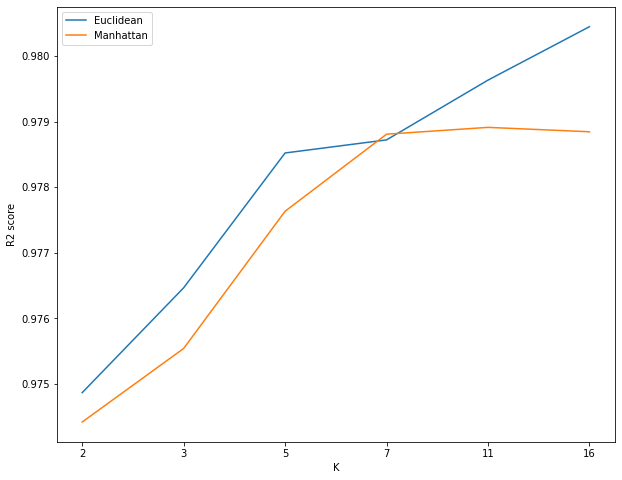

In [100]:
# plot
import matplotlib.pyplot as plt
k=["2","3","5","7","11","16"]

eucR2=[0.9748662212049282,0.976465794171598, 0.9785222674910612, 0.9787217256695, 0.9796335511035726, 0.9804484990988368]
manR2=[0.9744183172802819, 0.9755402516169621, 0.9776335294894599, 0.9788087321433679, 0.9789128046449571, 0.9788456678676201]

plt.plot(k,eucR2,label='Euclidean')
plt.plot(k,manR2,label='Manhattan')
plt.xlabel("K")
plt.ylabel("R2 score")
plt.legend()

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

No.
The R-squared values are different for every K.
For a small value of k, our model is vulnerable to noise.
For a larger value of k, the computation time increases so we need to maintain a balance.
Generally an odd number less than sqrt(n) is chosen as k.

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [101]:
# scikit-learn KNN Regressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

A_pred=neigh.predict(x_test)
print("R2_score using scikit-learn is:",r2_score(A_pred,y_test))

R2_score using scikit-learn is: 0.9523495277078802


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

The R2_score of my model for k=3 is 0.976465794171598 while for scikit-learn model it is 0.9523495277078802


6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


Advantages of KNN :
1. No Training Period: KNN is called Lazy Learner as it does not learn anything in the training period.
    It stores the training dataset and learns from it only at the time of making real time predictions.
    This makes the KNN algorithm much faster than other algorithms.
2. New data can be added seamlessly which will not impact the accuracy of the algorithm.
3. KNN is very easy to implement. There are only two parameters required to implement KNN
    i.e.K & the distance function.
4. Versatile – useful for regression and classification

Disadvantages of KNN
1. Does not work well with large dataset
    as the cost of calculating the distance is huge in turn degrading the performance of the algorithm.
2. Does not work well with high dimensions
    as it becomes difficult for the algorithm to calculate the distance in each dimension.
3. Need feature scaling(standardization and normalization) before applying KNN algorithm to any dataset,
    otherwise KNN may generate wrong predictions.
4. Accuracy depends on the quality of the data
5. Sensitive to the scale of the data and irrelevant features
6. Require high memory – need to store all of the training data